In [3]:
import scanpy as sc
import numpy as np

import anndata2ri

In [4]:
anndata2ri.activate()
%load_ext rpy2.ipython

# Run R libraries to load datasets

In [16]:
%%R 
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(SingleCellExperiment))

In [18]:
%%R 
# load the 10x data:
larvadata<- readRDS("~/desktop/ZebrafishRGC_data/larva_zFish_FINAL.rds")

In [19]:
%%R 
adultdata<- readRDS("~/desktop/ZebrafishRGC_data/adult_zFish_FINAL.rds")

In [7]:
%%R -o larva_converted
#convert the Seurat object to a SingleCellExperiment object
larva_converted <- as.SingleCellExperiment(larvadata)

larva_converted

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/fernandes/anaconda3/envs/seq/lib/python3.7/site-packages/anndata2ri/py2r.py:46: UserWarning: Duplicated var_names: Index(['dedd1', 'dedd1'], dtype='object')
  warn(f"Duplicated {name}: {idx[idx.duplicated(False)].sort_values()}")


class: SingleCellExperiment 
dim: 12055 11406 
metadata(0):
assays(2): X logcounts
rownames(12055): ptpro eps8 ... znf985 znf995
rowData names(5): vst.mean vst.variance vst.variance.expected
  vst.variance.standardized vst.variable
colnames(11406): ZfishRGC18_AAACCTGAGAGGGCTT-1
  ZfishRGC18_AAACCTGAGTTGTAGA-1 ... ZfishRGC20_TTCTCAACACGTAAGG-1
  ZfishRGC20_TTGGCAACATAACCTG-1
colData names(10): orig.ident nCount_RNA ... dendro_order ident
reducedDimNames(3): PCA TSNE UMAP
altExpNames(0):


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


/Users/fernandes/anaconda3/envs/seq/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/fernandes/anaconda3/envs/seq/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/fernandes/anaconda3/envs/seq/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/fernandes/anaconda3/envs/seq/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/fernandes/anaconda3/envs/seq/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` s

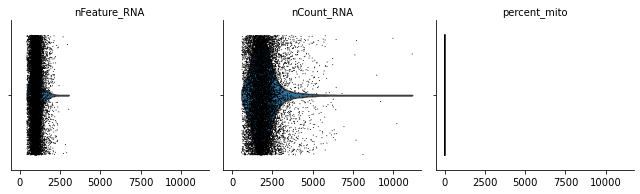

In [20]:
mito_genes = larva_converted.var_names.str.startswith('mt-')
larva_converted.obs['percent_mito'] = np.sum(larva_converted[:, mito_genes].X, axis=1).A1 / np.sum(larva_converted.X, axis=1).A1

sc.pl.violin(larva_converted, ['nFeature_RNA', 'nCount_RNA', 'percent_mito'], jitter=0.4, multi_panel=True)

In [23]:
%%R

SaveH5Seurat(adultdataadultdata, filename = "adultdata.h5Seurat")
Convert("adultdata.h5Seurat", dest = "h5ad")

R[write to console]: Error in SaveH5Seurat(adultdataadultdata, filename = "adultdata.h5Seurat") : 
  could not find function "SaveH5Seurat"




Error in SaveH5Seurat(adultdataadultdata, filename = "adultdata.h5Seurat") : 
  could not find function "SaveH5Seurat"


In [8]:
%%R -o adult_converted
#convert the Seurat object to a SingleCellExperiment object
adult_converted <- as.SingleCellExperiment(adultdata)

adult_converted

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/fernandes/anaconda3/envs/seq/lib/python3.7/site-packages/anndata2ri/py2r.py:46: UserWarning: Duplicated var_names: Index(['dedd1', 'dedd1', 'ppp1r1b', 'ppp1r1b'], dtype='object')
  warn(f"Duplicated {name}: {idx[idx.duplicated(False)].sort_values()}")
R[write to console]: Error in validObject(.Object) : 
  invalid class “SummarizedExperiment” object: 
    'x@assays' is not parallel to 'x'



RRuntimeError: Error in validObject(.Object) : 
  invalid class “SummarizedExperiment” object: 
    'x@assays' is not parallel to 'x'


In [15]:
larva_converted.write('larva_converted.hdf5')

TypeError: No conversion path for dtype: dtype('<U12')

Above error raised while writing key 'obs' of <class 'h5py._hl.files.File'> from /.